In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [68]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [69]:
type(X_train)

numpy.ndarray

In [70]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [71]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [72]:
X_train[0].shape

(28, 28)

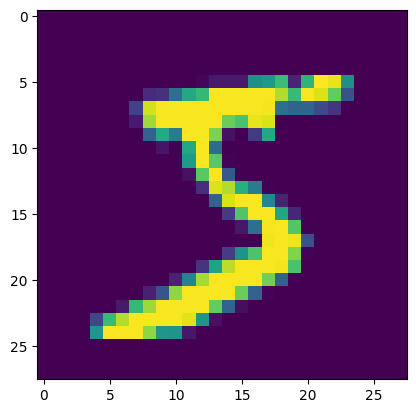

In [73]:
plt.imshow(X_train[0])

In [74]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
X_train = X_train / 255
X_test = X_test / 255

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8155 - loss: 0.5932
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9164 - loss: 0.2955
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9270 - loss: 0.2453
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9341 - loss: 0.2105
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9370 - loss: 0.1929
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9410 - loss: 0.1797
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9402 - loss: 0.1671
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9427 - loss: 0.1594
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9463 - loss: 0.1531
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9437 - loss: 0.1501
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9451 - loss: 0.1443
Epoch 12/20
1875/1875 ━━━━━━━━

In [79]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9692 - loss: 0.1010
0.9692000150680542


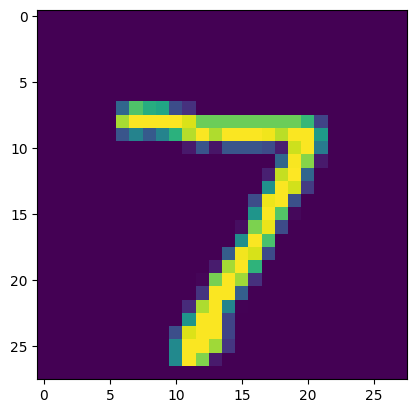

In [80]:
plt.imshow(X_test[0])

In [81]:
print(Y_test[0])

7


In [82]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step


In [83]:
Y_pred[0]

array([9.2029391e-04, 2.6360132e-02, 1.8818212e-01, 7.8426301e-01,
       3.0058245e-03, 1.1498721e-02, 1.3916648e-03, 9.9999851e-01,
       2.6714197e-05, 9.4494659e-01], dtype=float32)

In [84]:
result = np.argmax(Y_pred[0])
result

np.int64(7)

In [85]:
Y_pred_max = np.argmax(Y_pred,axis=1)

In [86]:
confusionMatrix = confusion_matrix(Y_test,Y_pred_max)
confusionMatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    1,    0,    2,    2,    2,    0],
       [   0, 1121,    4,    1,    0,    0,    3,    0,    5,    1],
       [   4,    0, 1012,    2,    5,    1,    2,    4,    2,    0],
       [   0,    0,    5,  986,    0,    6,    0,    7,    2,    4],
       [   0,    0,    4,    1,  965,    0,    3,    0,    2,    7],
       [   3,    0,    1,   51,    1,  820,    4,    1,    5,    6],
       [   9,    3,    0,    1,    9,    4,  929,    0,    3,    0],
       [   2,    3,    9,    1,    1,    1,    0, 1005,    0,    6],
       [   7,    3,    3,    5,    6,    5,    2,    6,  931,    6],
       [   4,    2,    0,    8,   21,    4,    0,    6,    1,  963]],
      dtype=int32)>

Text(0.5, 69.7222222222222, 'Predicted La')

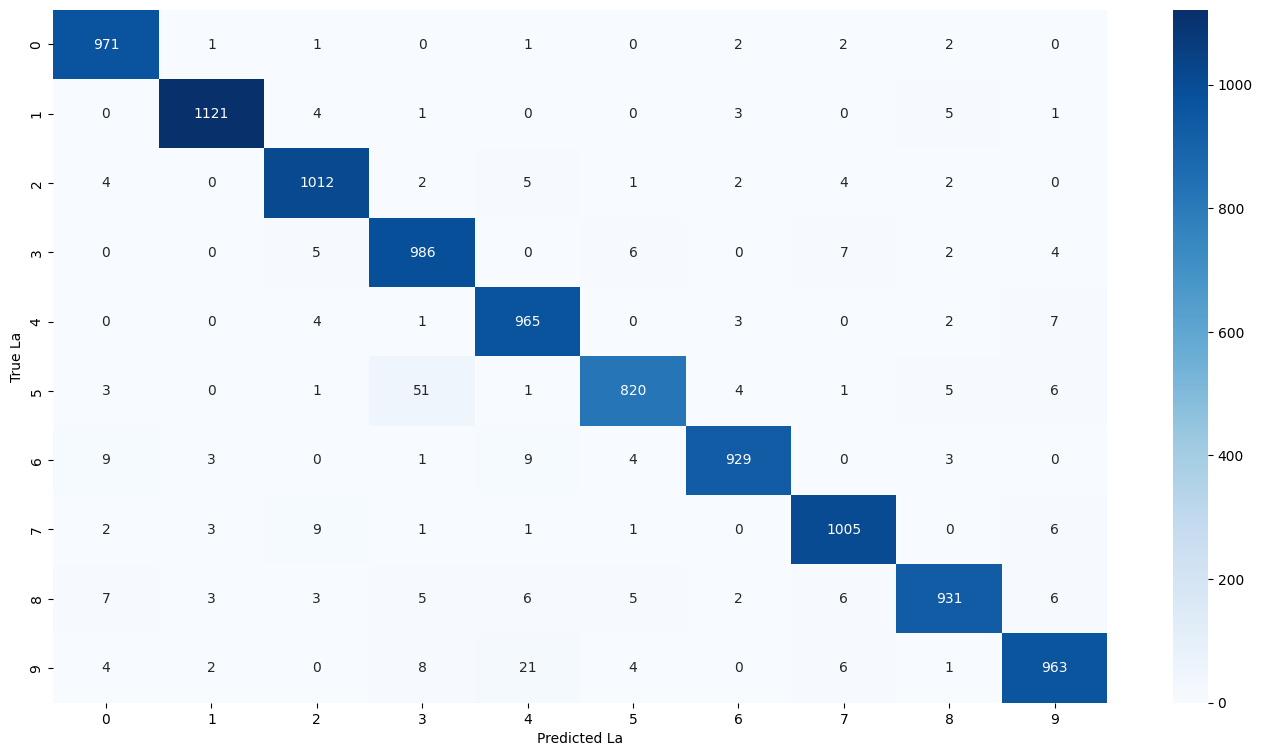

In [87]:
plt.figure(figsize=(17,9))
sns.heatmap(confusionMatrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True La')
plt.xlabel('Predicted La')

In [88]:
from tensorflow.keras.preprocessing.image import img_to_array

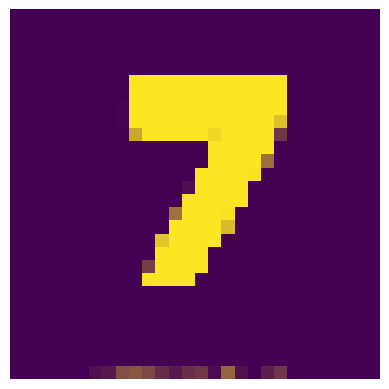

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)


img = cv2.resize(img, (28, 28))


img_norm = img / 255.0


height, width = img.shape
colored_img = np.zeros((height, width, 3), dtype=np.uint8)


background_color = np.array([250, 230, 34], dtype=np.uint8)  
digit_color = np.array([68, 1, 84], dtype=np.uint8) 


for i in range(3):
    colored_img[:, :, i] = (img_norm * digit_color[i] + (1 - img_norm) * background_color[i]).astype(np.uint8)


plt.imshow(colored_img)
plt.axis('off')
plt.show()


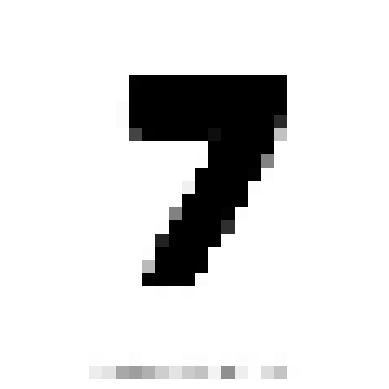

In [ ]:
img_input = img_norm.reshape(1, 28, 28)


plt.imshow(img_input[0], cmap='gray')
plt.axis('off')
plt.show()

In [106]:
Y_pred = model.predict(img_input)
predicted_digit = np.argmax(Y_pred)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted digit: 7
